In [11]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

columns = ['total duration','load duration', 'prompt eval count', 'prompt eval duration','prompt eval rate','eval count','eval duration','eval rate']
rows = []
current_row = []
with open('/Users/adam/Downloads/text1.txt', 'r') as file:
    for line in file:
        pattern = r"\s(\d+m)?(\d+(\.?\d+)?)"
        result = re.search(pattern, line)
        if not result:
            continue
        result = result.groups()
        if result[0] != None:
            minutes = int(result[0][:-1])
            seconds = float(result[1])
            current_row.append(minutes*60 + seconds)
        else:
            current_row.append(result[1])
        if len(current_row) == len(columns):
            rows.append(current_row)
            current_row = []

df = pd.DataFrame(rows, columns=columns)
print(df)

   total duration load duration prompt eval count prompt eval duration  \
0     4.175484246     36.669776                16            86.158192   
1      2.83066848     37.467608                38           708.925162   
2    21.202907893     38.496037                40           746.302332   
3      7.47741603     37.168773                32           670.896921   
4    12.162052326     56.497719                24            480.22984   
5    19.461214432     37.572201                22           438.898331   
6    46.403514532     36.547454                21           419.589603   
7     4.436162761     36.550354                19           362.823836   
8     5.436755418     39.982107                26           541.881371   
9    21.359703119      36.13002                16           305.271101   
10   16.076264637     40.088017                50          1.113888368   
11    6.850157987     38.549176                15           277.685682   
12     107.414877     36.549063       

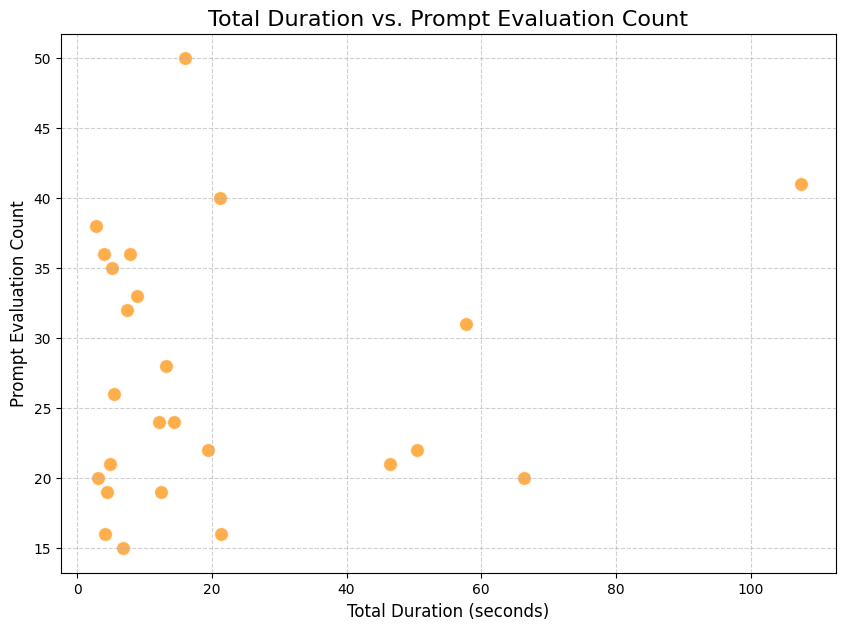

In [16]:
columns = ['total duration','load duration', 'prompt eval count', 'prompt eval duration','prompt eval rate','eval count','eval duration','eval rate']
rows = []
current_row = []
# IMPORTANT: Make sure the file path is correct on your system!
file_path = '/Users/adam/Downloads/text1.txt'

try:
    with open(file_path, 'r') as file:
        for line in file:
            # Pattern to correctly handle optional minutes and then float seconds
            pattern = r"\s*(\d+m)?(\d+(\.\d+)?)\s*"
            result = re.search(pattern, line)
            if not result:
                continue

            minutes_part = result.group(1)
            seconds_part = result.group(2)

            if minutes_part is not None:
                minutes = int(minutes_part[:-1])
                seconds = float(seconds_part)
                current_row.append(minutes * 60 + seconds) # Convert to total seconds
            else:
                current_row.append(float(seconds_part)) # Convert directly to float

            if len(current_row) == len(columns):
                rows.append(current_row)
                current_row = []
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'. Please check the path.")
    exit() # Exit if the file isn't found

df = pd.DataFrame(rows, columns=columns)

# --- Ensure relevant columns are numeric ---
numerical_cols_to_convert = [
    'total duration', 'load duration', 'prompt eval count',
    'prompt eval duration', 'prompt eval rate', 'eval count',
    'eval duration', 'eval rate'
]

for col in numerical_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Drop rows with NaN values in the columns we're plotting ---
df.dropna(subset=['prompt eval count', 'total duration'], inplace=True)

# --- Create the Scatter Plot with Swapped Axes ---
if df.empty:
    print("DataFrame is empty after processing and dropping non-numeric/missing rows. Cannot generate plot.")
else:
    plt.figure(figsize=(10, 7))

    sns.scatterplot(
        x='total duration',    # **Now on the X-axis**
        y='prompt eval count', # **Now on the Y-axis**
        data=df,
        s=100,
        alpha=0.7,
        color='darkorange'
    )

    # Update titles and labels to reflect the swapped axes
    plt.title('Total Duration vs. Prompt Evaluation Count', fontsize=16)
    plt.xlabel('Total Duration (seconds)', fontsize=12)
    plt.ylabel('Prompt Evaluation Count', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
